# Data Science Intern at LetsGrowMore
# Author : Smiti Chhabra

# Task 01 : Iris Flowers Classification ML Project


## This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris

### Importing necessary libraries

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

### Importing the Dataset

In [264]:
df = pd.read_csv("Iris.csv")

### Data Overview

In [265]:
df.shape

(150, 6)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [267]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [268]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [269]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [270]:
df.value_counts

<bound method DataFrame.value_counts of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       I

In [271]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [272]:
df.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [273]:
df.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [274]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [275]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [276]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [277]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [278]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [279]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [280]:
df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [281]:
df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [282]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

### Data Visualization

#### Scatter Plot

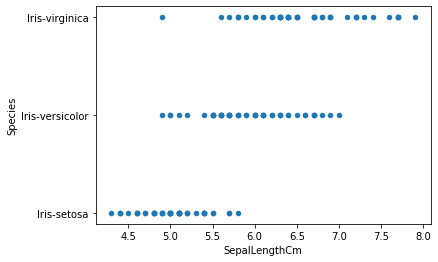

In [283]:
df.plot(kind="scatter", x = "SepalLengthCm", y = "Species")

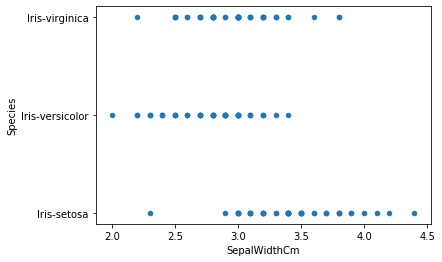

In [284]:
df.plot(kind="scatter", x = "SepalWidthCm", y = "Species")

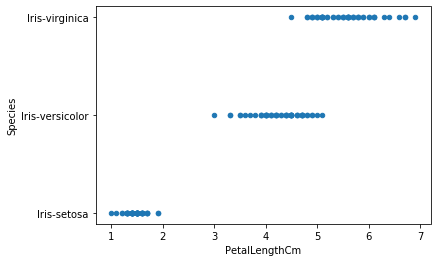

In [285]:
df.plot(kind="scatter", x = "PetalLengthCm", y = "Species")

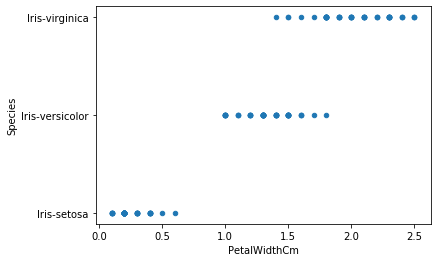

In [286]:
df.plot(kind="scatter", x = "PetalWidthCm", y = "Species")

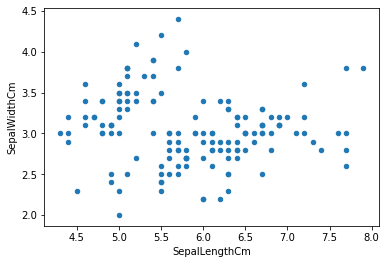

In [287]:
df.plot(kind="scatter", x = "SepalLengthCm", y = "SepalWidthCm")

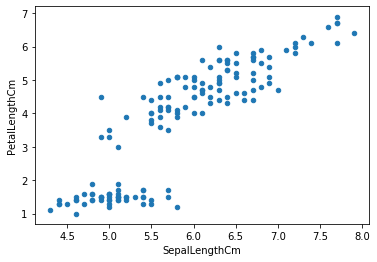

In [288]:
df.plot(kind="scatter", x = "SepalLengthCm", y = "PetalLengthCm")

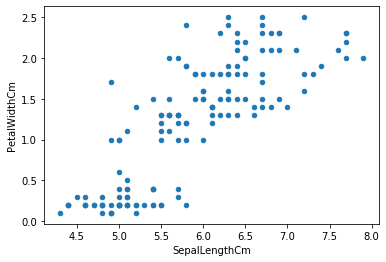

In [289]:
df.plot(kind="scatter", x = "SepalLengthCm", y = "PetalWidthCm")

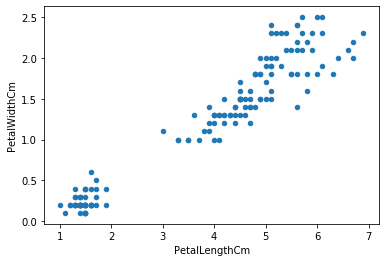

In [290]:
df.plot(kind="scatter", x = "PetalLengthCm", y = "PetalWidthCm")

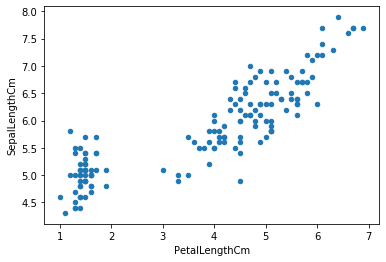

In [291]:
df.plot(kind="scatter", x = "PetalLengthCm", y = "SepalLengthCm")

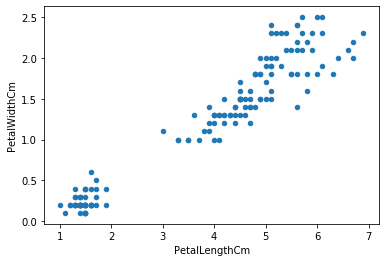

In [292]:
df.plot(kind="scatter", x = "PetalLengthCm", y = "PetalWidthCm")

#### Bar Graph

<BarContainer object of 150 artists>

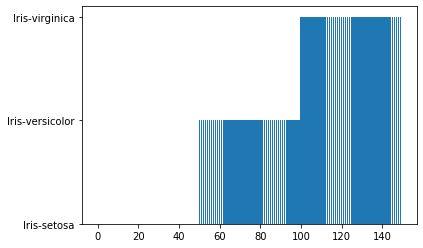

In [293]:
plt.bar(df.index, df['Species'])

<BarContainer object of 150 artists>

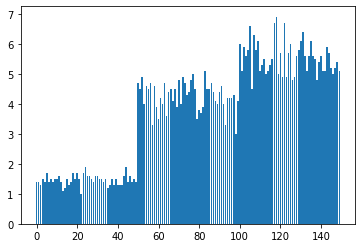

In [294]:
plt.bar(df.index, df['PetalLengthCm'])

<BarContainer object of 150 artists>

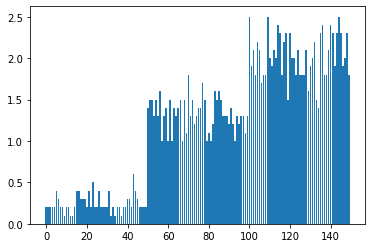

In [295]:
plt.bar(df.index, df['PetalWidthCm'])

<BarContainer object of 150 artists>

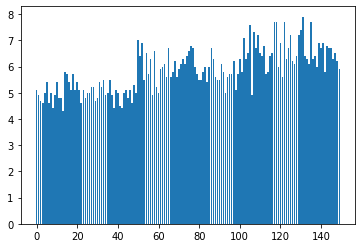

In [296]:
plt.bar(df.index, df['SepalLengthCm'])

<BarContainer object of 150 artists>

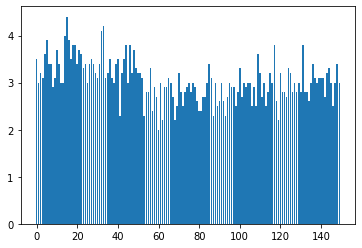

In [297]:
plt.bar(df.index, df['SepalWidthCm'])

#### Pie Chart

([<matplotlib.patches.Wedge at 0x24e084f4f28>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0999999999999954, -1.0298943258065002e-07, ''),
  Text(0.5500001486524352, -0.9526278583383436, '')])

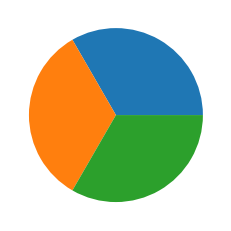

In [298]:
plt.pie(df['Species'].value_counts())

([<matplotlib.patches.Wedge at 0x24e08556a20>,
 [Text(1.0998162248289156, 0.020106506486022895, ''),
  Text(1.0983893303845753, 0.059505284616782936, ''),
  Text(1.0956920682406373, 0.0972568331509659, ''),
  Text(1.091842090596001, 0.1337192925607762, ''),
  Text(1.0865955946241563, 0.17120167564418406, ''),
  Text(1.0794604973247504, 0.21157749104146875, ''),
  Text(1.0711853524326178, 0.25012385078958144, ''),
  Text(1.061946535861541, 0.2868266984987159, ''),
  Text(1.051681945368862, 0.322436173195822, ''),
  Text(1.0403517900227819, 0.35730680513585744, ''),
  Text(1.0264549462634536, 0.39546206302411735, ''),
  Text(1.0113144459682202, 0.4327159476792971, ''),
  Text(0.9958295372217366, 0.4672510383046166, ''),
  Text(0.9800624176136543, 0.4994773844542706, ''),
  Text(0.9613427184591771, 0.5346215274991454, ''),
  Text(0.9384959352390051, 0.5737816479636354, ''),
  Text(0.9149313166628202, 0.6106559471499793, ''),
  Text(0.8913070906159923, 0.644648485779386, ''),
  Text(0.8656

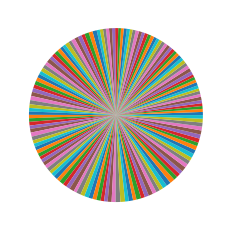

In [299]:
plt.pie(df['SepalLengthCm'])

([<matplotlib.patches.Wedge at 0x24e5fed0978>,
 [Text(1.0996831475300202, 0.026400284817938234, ''),
  Text(1.0974143386835165, 0.07537751157885467, ''),
  Text(1.0932185098529177, 0.12195609748990209, ''),
  Text(1.0869309197711725, 0.16905968072072336, ''),
  Text(1.0780185782521932, 0.21880572420099098, ''),
  Text(1.0653438572905787, 0.27393879924762604, ''),
  Text(1.050300794302062, 0.3269070838762259, ''),
  Text(1.033919648614295, 0.37551319578583786, ''),
  Text(1.0167359650338366, 0.4198189817132061, ''),
  Text(0.9986058476217107, 0.4612877205126156, ''),
  Text(0.9760165278804934, 0.5073378926357719, ''),
  Text(0.9501667972280096, 0.554240974166893, ''),
  Text(0.92493370891734, 0.5953970390490818, ''),
  Text(0.8996587796380826, 0.6329408188923481, ''),
  Text(0.8682496146028802, 0.6753833035706097, ''),
  Text(0.8279246638331718, 0.7242518560671626, ''),
  Text(0.7853813938678693, 0.7701792428819171, ''),
  Text(0.7453017838004162, 0.8090273487737714, ''),
  Text(0.70388

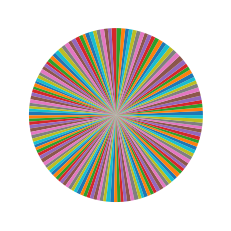

In [73]:
plt.pie(df['SepalWidthCm'])

([<matplotlib.patches.Wedge at 0x24e087cc3c8>,
 [Text(1.0999665292027312, 0.008581062503984837, ''),
  Text(1.099698775045848, 0.025741098707345537, ''),
  Text(1.0991870630368616, 0.04228238938847268, ''),
  Text(1.098393613943653, 0.059426162990736116, ''),
  Text(1.0972899651747112, 0.07716691212483012, ''),
  Text(1.0957933682144672, 0.09610876222901549, ''),
  Text(1.0939698141454062, 0.11502193590209456, ''),
  Text(1.0919683928487418, 0.13268394409021694, ''),
  Text(1.0896818394542467, 0.15031130617358515, ''),
  Text(1.0871107510211129, 0.16789941933881836, ''),
  Text(1.0841522981242897, 0.1860478284523136, ''),
  Text(1.0807769736857342, 0.20474650949578108, ''),
  Text(1.0772034789518232, 0.22278389738508728, ''),
  Text(1.0739955843195006, 0.23776771198422803, ''),
  Text(1.0708602352436807, 0.2515121400128617, ''),
  Text(1.0669552183327564, 0.2675940247324296, ''),
  Text(1.0626505023711554, 0.28420751188230625, ''),
  Text(1.0582545356189088, 0.30016218589623794, ''),
 

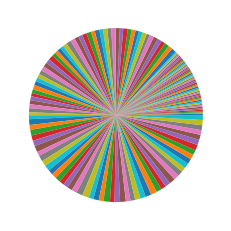

In [300]:
plt.pie(df['PetalLengthCm'])

([<matplotlib.patches.Wedge at 0x24e08a30da0>,
 [Text(1.0999932835069293, 0.0038439874667143326, ''),
  Text(1.099939552054486, 0.011531774632605815, ''),
  Text(1.0998320917742228, 0.01921899850505765, ''),
  Text(1.099670907915261, 0.02690528358568259, ''),
  Text(1.0994560083509595, 0.03459025442195065, ''),
  Text(1.09903296573699, 0.04611442532827156, ''),
  Text(1.098386755357154, 0.05955279721376251, ''),
  Text(1.0978245714021946, 0.06914629726592639, ''),
  Text(1.0973144934124537, 0.07681733233437767, ''),
  Text(1.0968967580644522, 0.08256816667272647, ''),
  Text(1.096448883802392, 0.08831673232456397, ''),
  Text(1.095804856753358, 0.09597768446755117, ''),
  Text(1.0952867076459467, 0.10172034238097338, ''),
  Text(1.0949245547306699, 0.10554723799249617, ''),
  Text(1.0943562561485907, 0.11128515008050419, ''),
  Text(1.093129468095837, 0.12275164349413982, ''),
  Text(1.0913068902362502, 0.13801909767450712, ''),
  Text(1.0895372094163633, 0.1513561009579845, ''),
  Tex

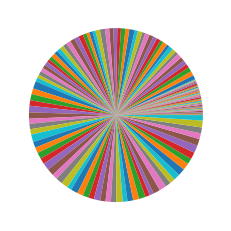

In [301]:
plt.pie(df['PetalWidthCm'])

#### Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x24e08cb6c50>,
 'caps': [<matplotlib.lines.Line2D at 0x24e08cc2390>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e08cb6860>],
 'medians': [<matplotlib.lines.Line2D at 0x24e08cc2a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e08cc2d68>],
 'means': []}

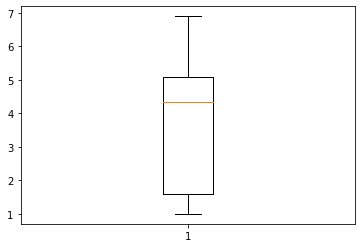

In [302]:
plt.boxplot(df["PetalLengthCm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24e08d1aba8>,
 'caps': [<matplotlib.lines.Line2D at 0x24e08d1aef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e08d1a7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x24e08d28978>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e08d28cc0>],
 'means': []}

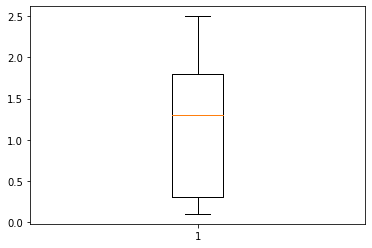

In [303]:
plt.boxplot(df["PetalWidthCm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24e09d57748>,
 'caps': [<matplotlib.lines.Line2D at 0x24e09d57da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e09d57358>],
 'medians': [<matplotlib.lines.Line2D at 0x24e09d62470>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e09d627b8>],
 'means': []}

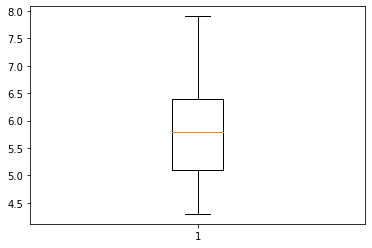

In [304]:
plt.boxplot(df["SepalLengthCm"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24e09db5b70>,
 'caps': [<matplotlib.lines.Line2D at 0x24e09db5eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e09db5780>],
 'medians': [<matplotlib.lines.Line2D at 0x24e09dc2940>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e09dc2c88>],
 'means': []}

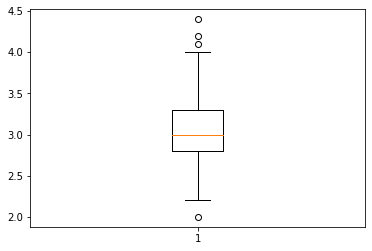

In [305]:
plt.boxplot(df["SepalWidthCm"])

#### Histogram

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

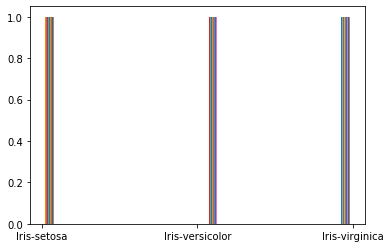

In [306]:
plt.hist(df['Species'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

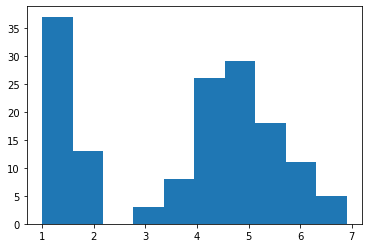

In [307]:
plt.hist(df['PetalLengthCm'])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

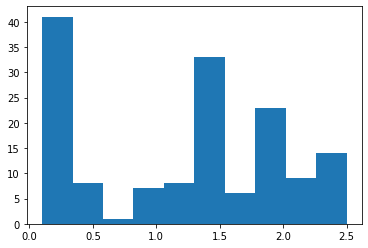

In [308]:
plt.hist(df['PetalWidthCm'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

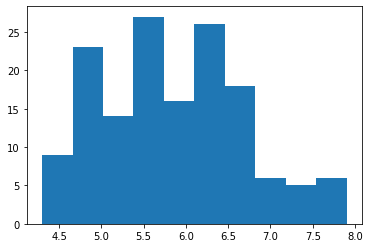

In [309]:
plt.hist(df['SepalLengthCm'])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

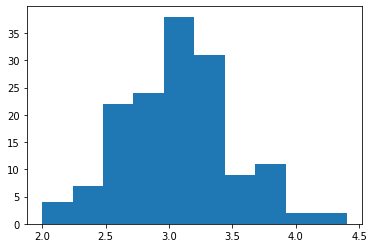

In [310]:
plt.hist(df['SepalWidthCm'])

#### KDE Plot

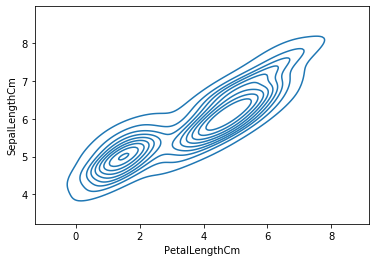

In [311]:
sns.kdeplot(data = df, x = "PetalLengthCm", y = "SepalLengthCm")

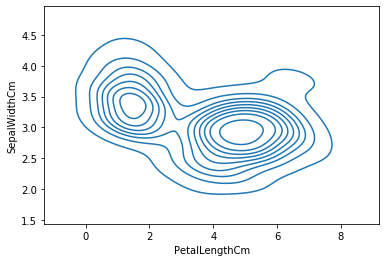

In [312]:
sns.kdeplot(data = df, x = "PetalLengthCm", y = "SepalWidthCm")

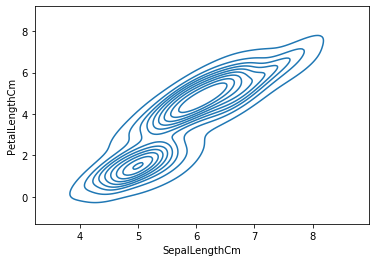

In [313]:
sns.kdeplot(data = df, x = "SepalLengthCm", y = "PetalLengthCm")

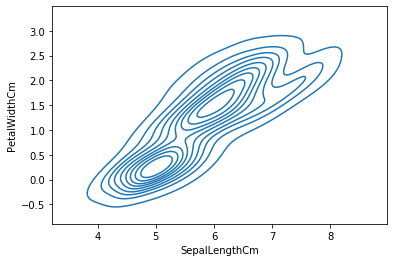

In [314]:
sns.kdeplot(data = df, x = "SepalLengthCm", y = "PetalWidthCm")

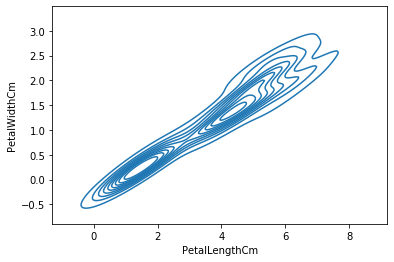

In [315]:
sns.kdeplot(data = df, x = "PetalLengthCm", y = "PetalWidthCm")

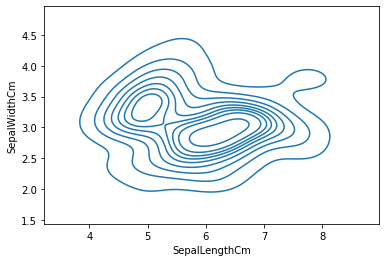

In [316]:
sns.kdeplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm")

#### Strip Plot

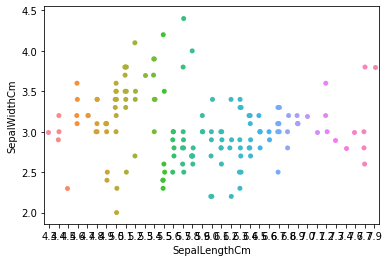

In [317]:
sns.stripplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm")

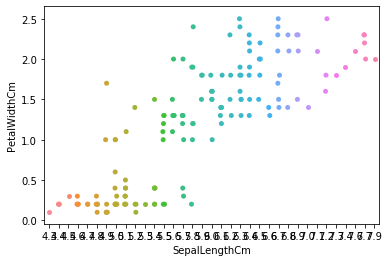

In [318]:
sns.stripplot(data = df, x = "SepalLengthCm", y = "PetalWidthCm")

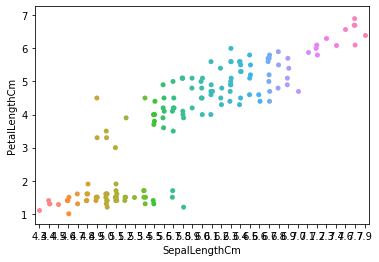

In [319]:
sns.stripplot(data = df, x = "SepalLengthCm", y = "PetalLengthCm")

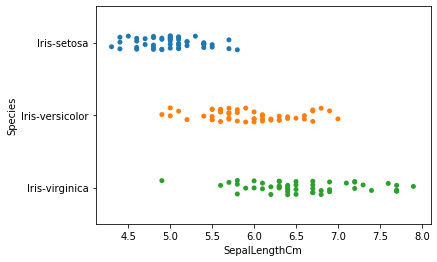

In [320]:
sns.stripplot(data = df, x = "SepalLengthCm", y = "Species")

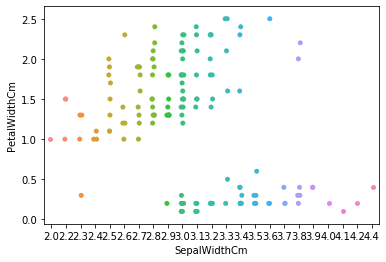

In [321]:
sns.stripplot(data = df, x = "SepalWidthCm", y = "PetalWidthCm")

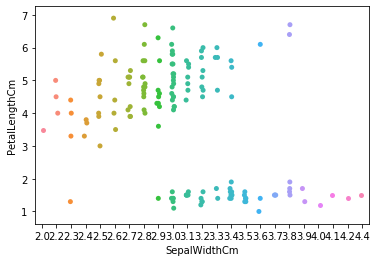

In [322]:
sns.stripplot(data = df, x = "SepalWidthCm", y = "PetalLengthCm")

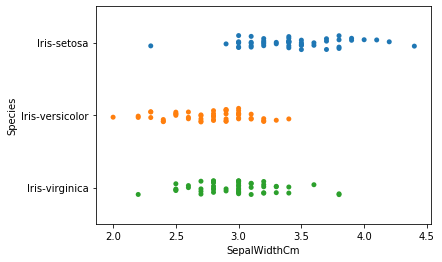

In [323]:
sns.stripplot(data = df, x = "SepalWidthCm", y = "Species")

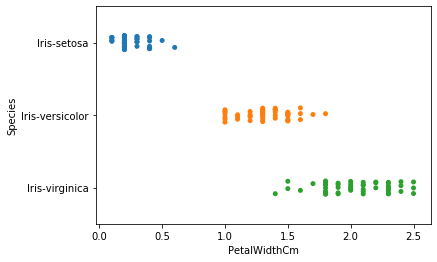

In [324]:
sns.stripplot(data = df, x = "PetalWidthCm", y = "Species")

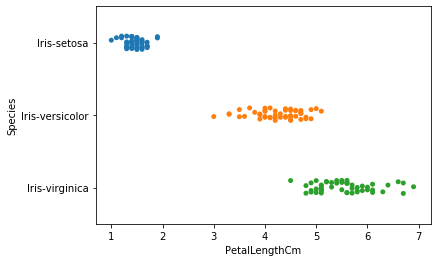

In [325]:
sns.stripplot(data = df, x = "PetalLengthCm", y = "Species")

#### Violin Plot

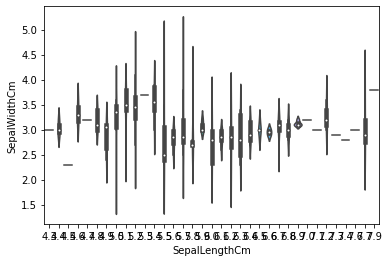

In [326]:
sns.violinplot(data = df, x = "SepalLengthCm", y = "SepalWidthCm")

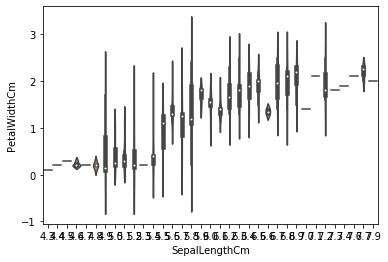

In [327]:
sns.violinplot(data = df, x = "SepalLengthCm", y = "PetalWidthCm")

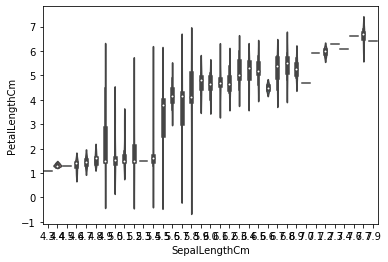

In [328]:
sns.violinplot(data = df, x = "SepalLengthCm", y = "PetalLengthCm")

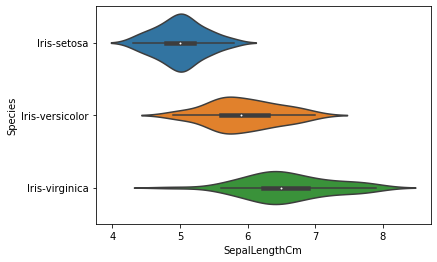

In [329]:
sns.violinplot(data = df, x = "SepalLengthCm", y = "Species")

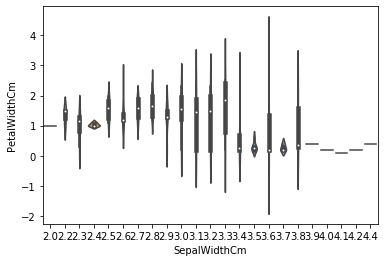

In [330]:
sns.violinplot(data = df, x = "SepalWidthCm", y = "PetalWidthCm")

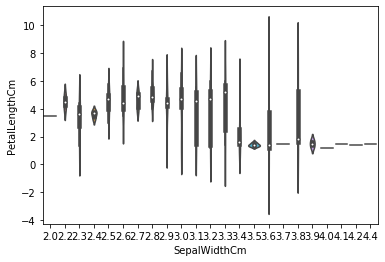

In [331]:
sns.violinplot(data = df, x = "SepalWidthCm", y = "PetalLengthCm")

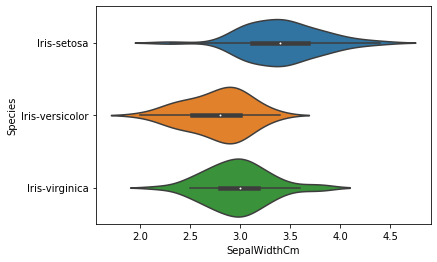

In [332]:
sns.violinplot(data = df, x = "SepalWidthCm", y = "Species")

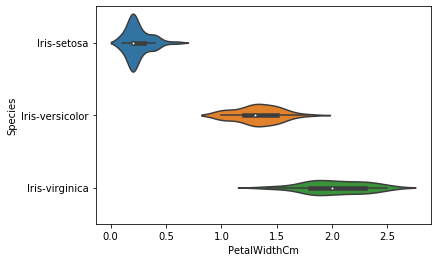

In [333]:
sns.violinplot(data = df, x = "PetalWidthCm", y = "Species")

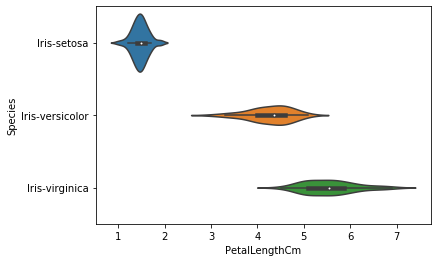

In [334]:
sns.violinplot(data = df, x = "PetalLengthCm", y = "Species")

#### DIS Plot

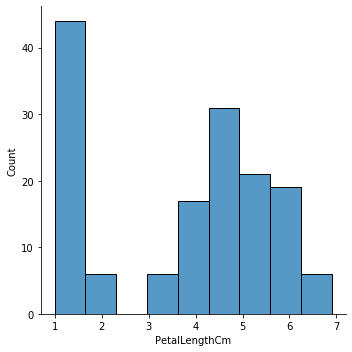

In [335]:
sns.displot(df["PetalLengthCm"])

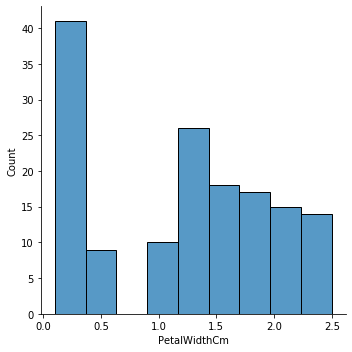

In [336]:
sns.displot(df["PetalWidthCm"])

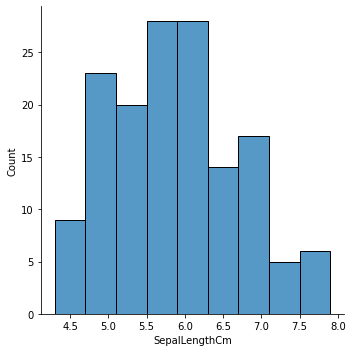

In [337]:
sns.displot(df["SepalLengthCm"])

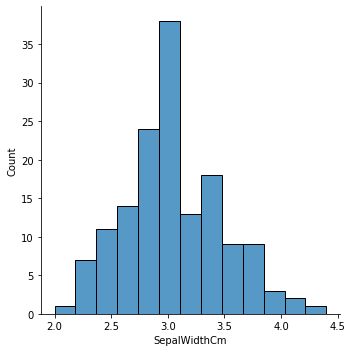

In [338]:
sns.displot(df["SepalWidthCm"])

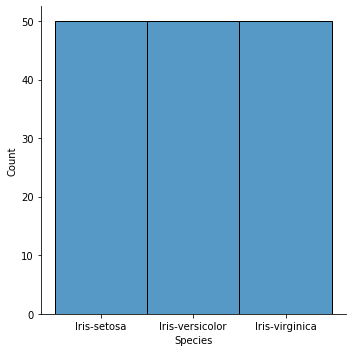

In [339]:
sns.displot(df["Species"])

#### Pair Plot

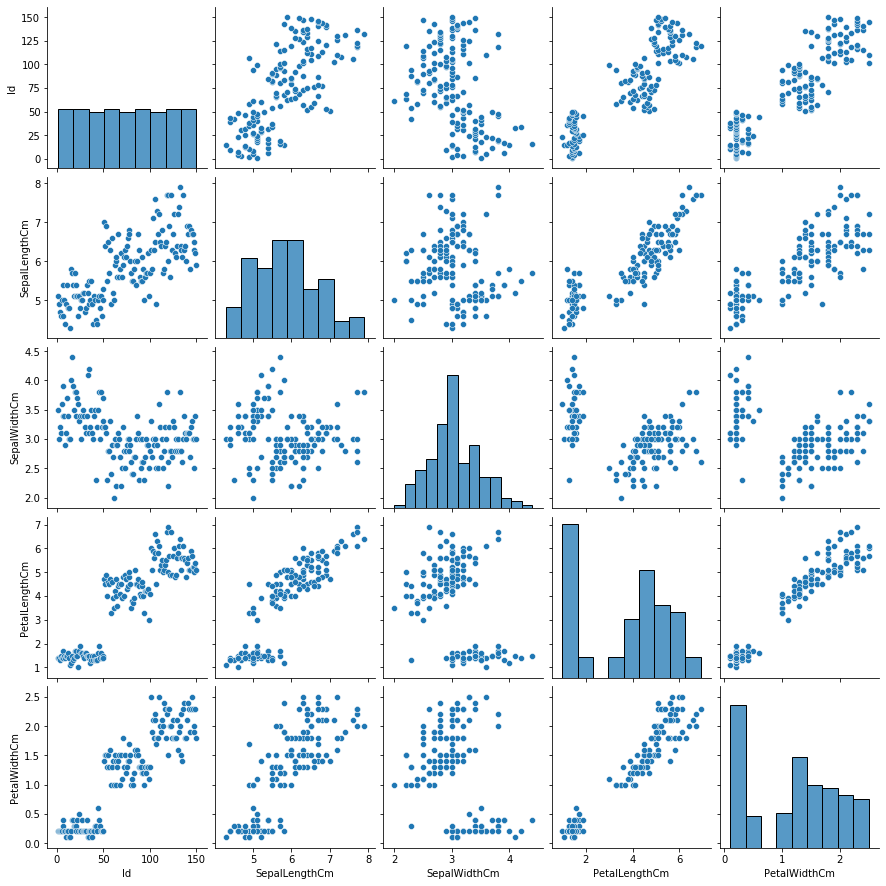

In [340]:
sns.pairplot(df)

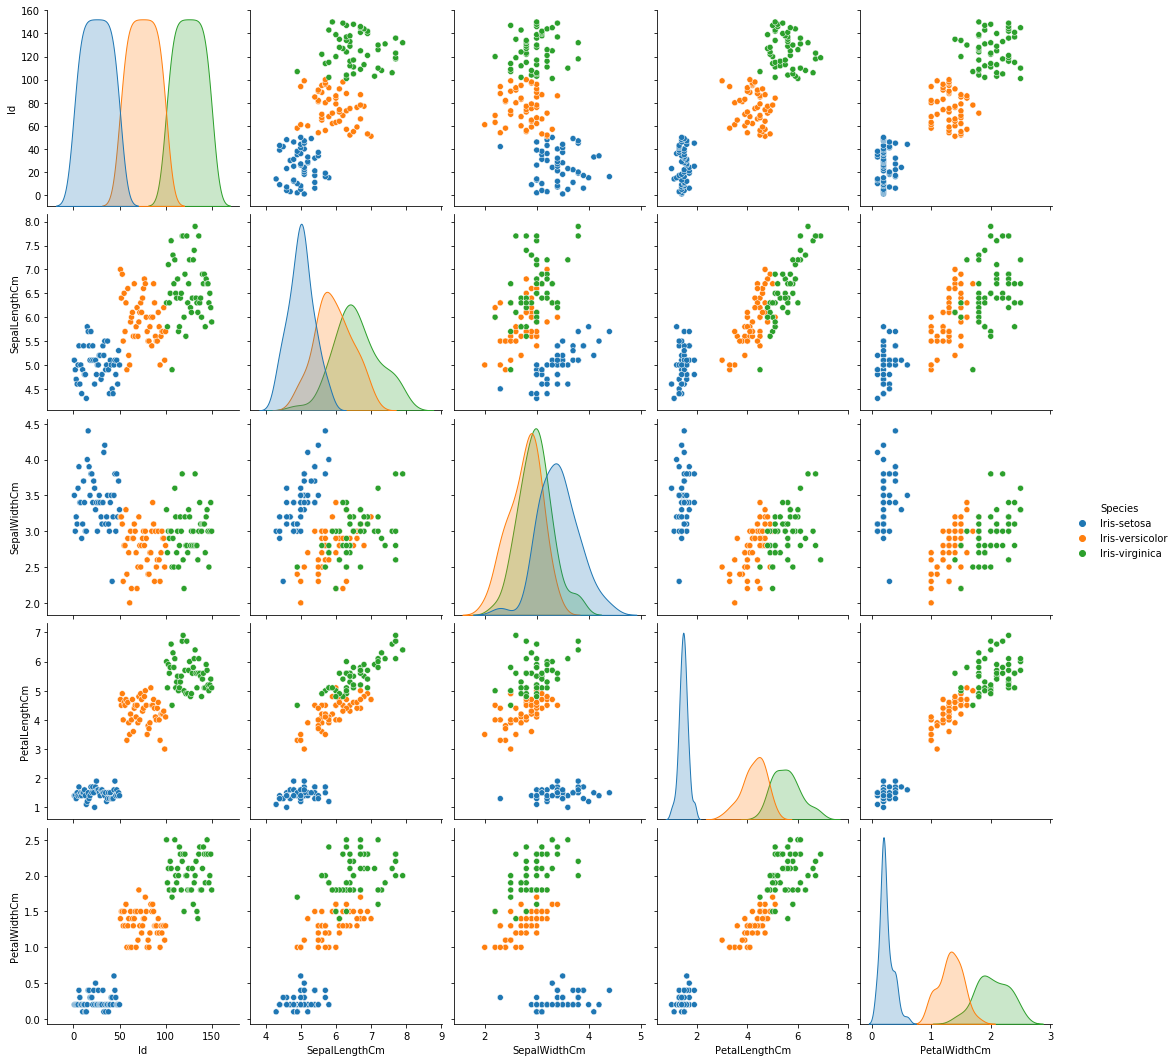

In [341]:
sns.pairplot(df, hue="Species", height=3)

c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density esti

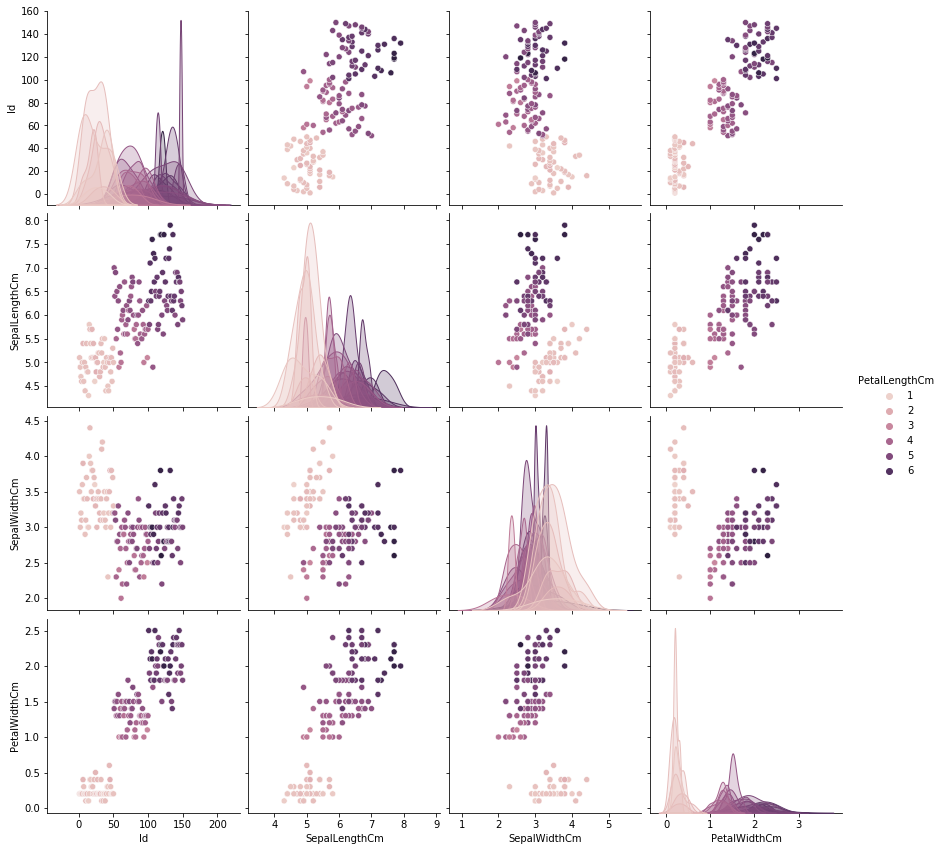

In [342]:
sns.pairplot(df, hue="PetalLengthCm", height=3)

c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density esti

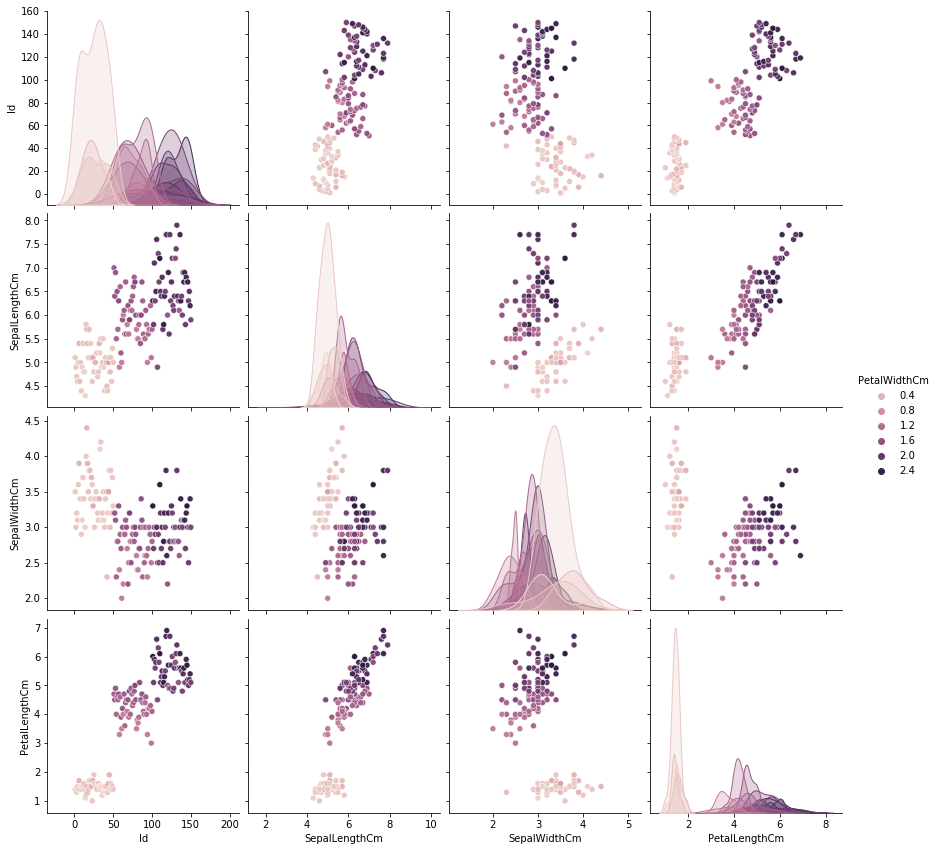

In [343]:
sns.pairplot(df, hue="PetalWidthCm", height=3)

c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density esti

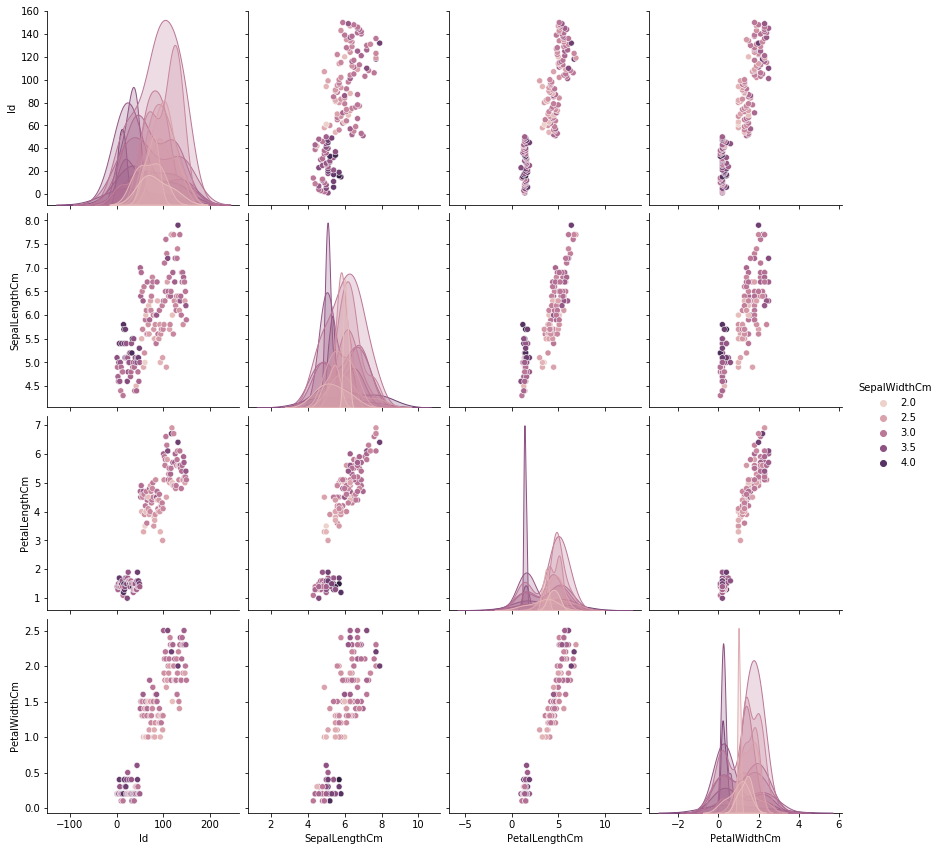

In [344]:
sns.pairplot(df, hue="SepalWidthCm", height=3)

### Data Preprocessing

###### Encoding Species Column

In [345]:
lb_make = LabelEncoder()
df["Species"] = lb_make.fit_transform(df["Species"])

#### Dividng the dataset for prediction

In [346]:
df2 = df.drop(["Species"], axis = 1)

In [347]:
df2 = df2.drop(columns=["Id"])

In [348]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [349]:
df3

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

#### Splitting the dataset into training and testing

In [350]:
x_train, x_test, y_train, y_test = train_test_split(df2, df3, test_size = 0.3)

### Supervised Machine Learning Models

#### Logistic Regression

In [351]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred1))

0.9555555555555556


c:\users\smiti chhabra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### KNeighbors Classifier

In [352]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(x_train, y_train)
y_pred2 = neigh.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.9777777777777777


#### Random Forest Classifier

In [353]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred3 = rfc.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred3))

0.9555555555555556


#### Decision Tree Classifier

In [354]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred4 = dtc.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred4))

0.9777777777777777


#### Gaussian NB

In [355]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred5 = gnb.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred5))

0.9555555555555556


#### Ada Boost Classifier

In [356]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred6 = adb.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred6))

0.9555555555555556


### Unsupervised Learning

#### KMeans Clustering

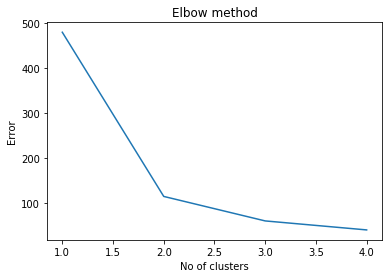

In [357]:
plot =[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i).fit(x_train)
    kmeans.fit(x_train)
    plot.append(kmeans.inertia_)
plt.plot(range(1, 5), plot)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## Conclusion : I have completed Iris Flowers Classification ML Project